# MULTIPLE LINEAR REGRESSION

In [536]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import numpy 
import scipy.stats as st
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [537]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [538]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [539]:
df.drop('Cylinders',axis=1,inplace=True)

In [540]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [541]:
df.drop_duplicates(inplace=True)

In [542]:
df.reset_index(inplace=True)

In [543]:
df

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      1435 non-null   int64 
 1   Price      1435 non-null   int64 
 2   Age_08_04  1435 non-null   int64 
 3   KM         1435 non-null   int64 
 4   Fuel_Type  1435 non-null   object
 5   HP         1435 non-null   int64 
 6   Automatic  1435 non-null   int64 
 7   cc         1435 non-null   int64 
 8   Doors      1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.4+ KB


In [545]:
df.describe()

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,717.921254,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,414.518894,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,0.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,359.500000,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,718.000000,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,1076.500000,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,1435.000000,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [546]:
df.isnull().sum()

index        0
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [547]:
df.dtypes

index         int64
Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Gears         int64
Weight        int64
dtype: object

<Axes: xlabel='Price', ylabel='Density'>

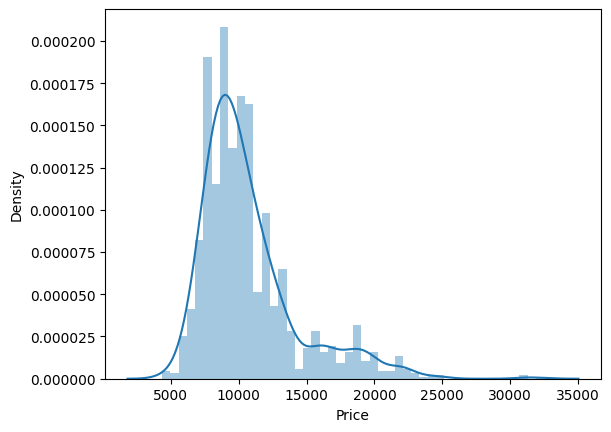

In [548]:
sns.distplot(df['Price'])

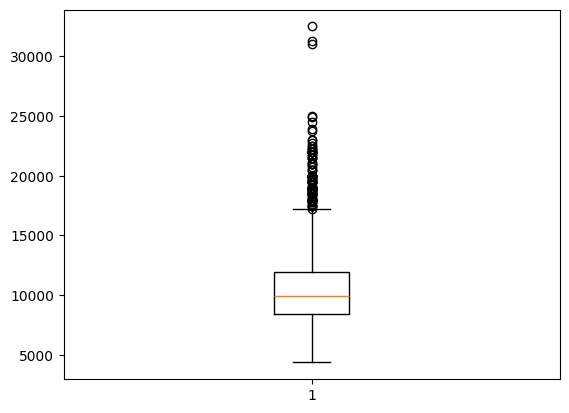

In [549]:
price_box=plt.boxplot(df['Price'])

In [550]:
df['Price'].skew()

np.float64(1.6965785809803777)

In [551]:
for i,j in price_box.items():
    print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x000001BF35E36D50>, <matplotlib.lines.Line2D object at 0x000001BF35E36E90>]
caps [<matplotlib.lines.Line2D object at 0x000001BF35E36FD0>, <matplotlib.lines.Line2D object at 0x000001BF35E37110>]
boxes [<matplotlib.lines.Line2D object at 0x000001BF35E36C10>]
medians [<matplotlib.lines.Line2D object at 0x000001BF35E37250>]
fliers [<matplotlib.lines.Line2D object at 0x000001BF35E37390>]
means []


In [552]:
price_out=[]
for i in price_box['fliers']:
    price_out.append(i.get_ydata())
print(len(price_out[0]))
price_out


109


[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
        19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
        20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
        19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795, 18245,
        18950])]

In [553]:
df['Price']=np.log1p(df['Price'])

In [554]:
df['Price'].skew()

np.float64(0.7281704224105784)

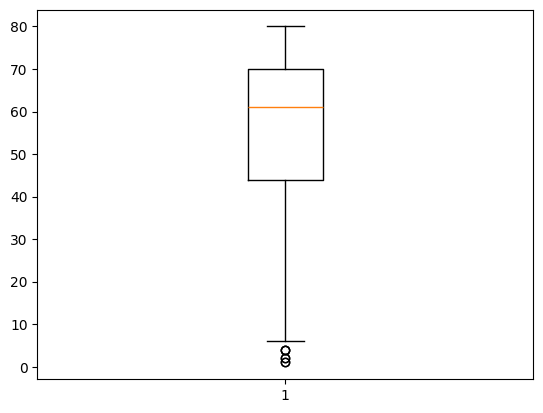

In [555]:
age_box=plt.boxplot(df['Age_08_04'])

In [556]:
age_out=[]
for i in age_box['fliers']:
    age_out.append(i.get_ydata())
print(len(age_out[0]))
age_out


7


[array([4, 4, 4, 2, 2, 1, 1])]

In [557]:
df['Age_08_04'].skew()

np.float64(-0.8255666018465969)

<Axes: xlabel='Age_08_04', ylabel='Density'>

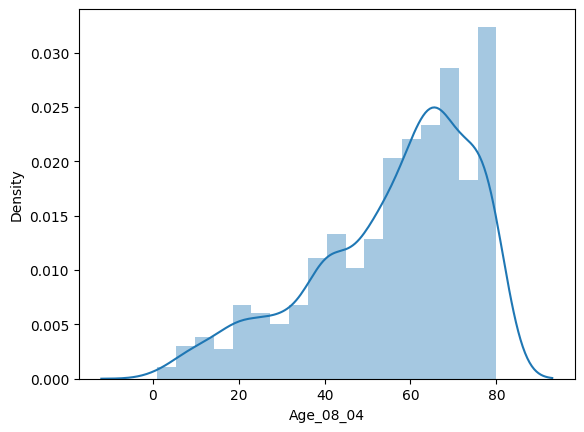

In [558]:
sns.distplot(df['Age_08_04'])

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1435 non-null   int64  
 1   Price      1435 non-null   float64
 2   Age_08_04  1435 non-null   int64  
 3   KM         1435 non-null   int64  
 4   Fuel_Type  1435 non-null   object 
 5   HP         1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   cc         1435 non-null   int64  
 8   Doors      1435 non-null   int64  
 9   Gears      1435 non-null   int64  
 10  Weight     1435 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 123.4+ KB


<Axes: xlabel='KM', ylabel='Density'>

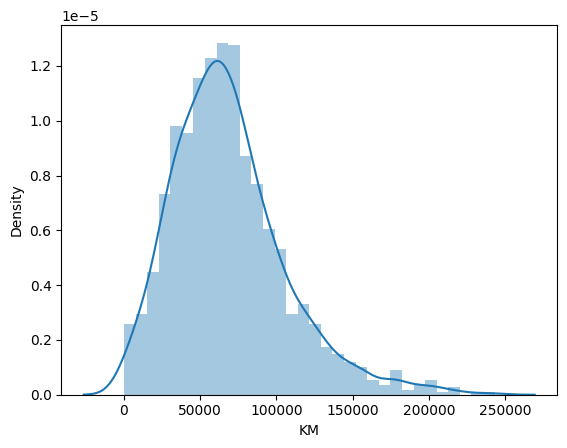

In [560]:
sns.distplot(df['KM'])

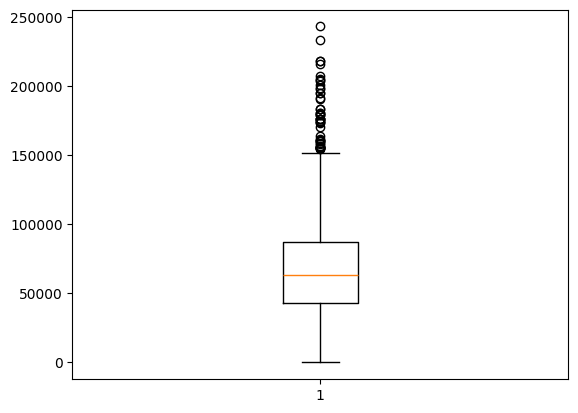

In [561]:
km_box=plt.boxplot(df['KM'])

In [562]:
km_out=[]
for i in km_box['fliers']:
    km_out.append(i.get_ydata())
print(len(km_out[0]))
km_out

49


[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900])]

In [563]:
df['KM']=np.sqrt(df['KM'])

In [564]:
df['KM'].skew()

np.float64(-0.11272039474713931)

(array([ 13.,  20.,  69., 210., 350., 419., 218.,  93.,  31.,  12.]),
 array([  1.        ,  50.19503018,  99.39006035, 148.58509053,
        197.7801207 , 246.97515088, 296.17018105, 345.36521123,
        394.5602414 , 443.75527158, 492.95030175]),
 <BarContainer object of 10 artists>)

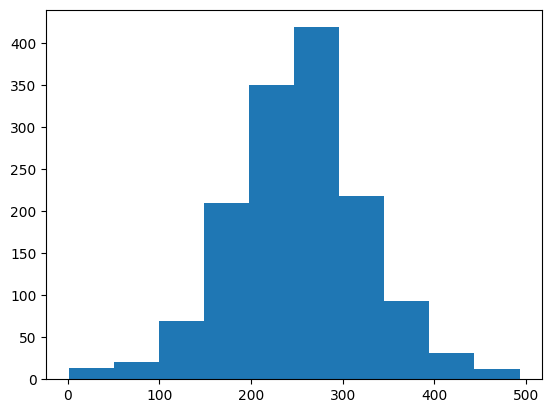

In [565]:
plt.hist(df['KM'])

In [566]:
df['KM'].corr(df['Price']) 

np.float64(-0.6526388754369344)

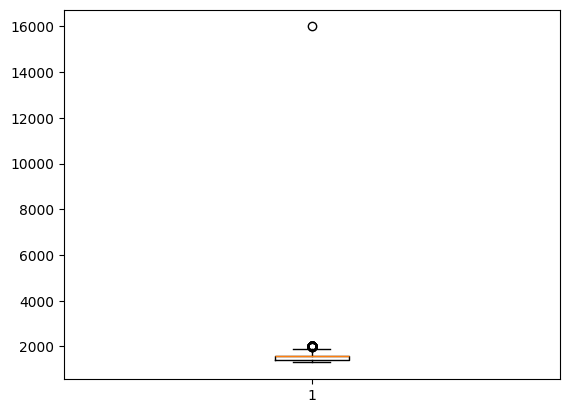

In [567]:
cc_box=plt.boxplot(df['cc'])

In [568]:
cc_out=[]
for i in cc_box['fliers']:
    cc_out.append(i.get_ydata())
print(len(cc_out[0]))
cc_out

122


[array([ 2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000, 16000,  2000,  2000,
         2000,  1995,  1995,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  1975,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000])]

In [569]:
df['cc'].value_counts()

cc
1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1332       2
1398       2
16000      1
1975       1
Name: count, dtype: int64

In [570]:
df['cc'].corr(df['Price'])

np.float64(0.10494938447602649)

<Axes: xlabel='cc', ylabel='Price'>

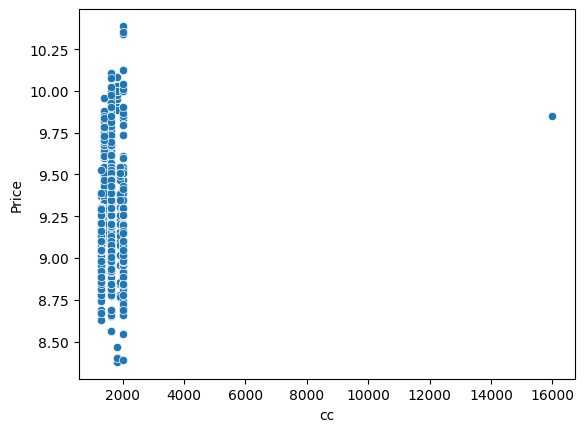

In [571]:
sns.scatterplot(x=df['cc'],y=df['Price']) # almost there is no relation between the cc and price

In [572]:
"""Q1=df['cc'].quantile(0.25)
Q3=df['cc'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)"""

"Q1=df['cc'].quantile(0.25)\nQ3=df['cc'].quantile(0.75)\nIQR=Q3-Q1\nprint(Q1,Q3,IQR)"

In [573]:
#Q1-1.5*IQR

In [574]:
#Q3+1.5*IQR

In [575]:
#df = df[(df['cc'] >= lower) & (df['cc'] <= upper)]

In [576]:
df = df[df['cc'] < 4000]

In [577]:
df.reset_index(inplace=True)

<Axes: xlabel='Doors', ylabel='Price'>

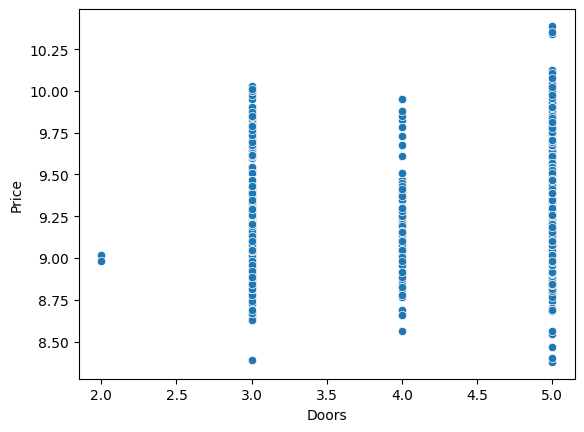

In [578]:
sns.scatterplot(x=df['Doors'],y=df['Price'])

In [579]:
df['Doors'].corr(df['Price']) # this also has less relation b/w the price

np.float64(0.18780951999638074)

In [580]:
df.columns

Index(['level_0', 'index', 'Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP',
       'Automatic', 'cc', 'Doors', 'Gears', 'Weight'],
      dtype='object')

In [581]:
df['Gears'].value_counts()

Gears
5    1388
6      43
3       2
4       1
Name: count, dtype: int64

<Axes: xlabel='Gears', ylabel='Price'>

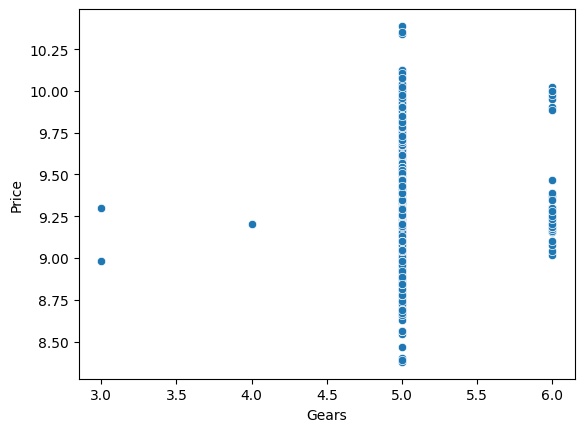

In [582]:
sns.scatterplot(x=df['Gears'],y=df['Price'])

In [583]:
df['Gears'].corr(df['Price']) 

np.float64(0.06804689093354264)

<Axes: xlabel='Weight', ylabel='Price'>

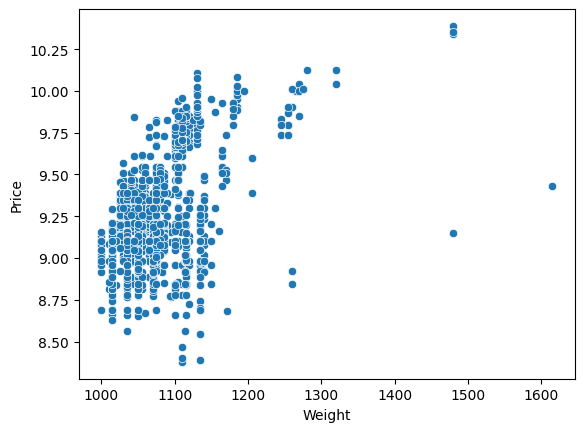

In [584]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [585]:
df['Weight'].corr(df['Price'])

np.float64(0.5018562688762409)

<Axes: xlabel='Weight', ylabel='Density'>

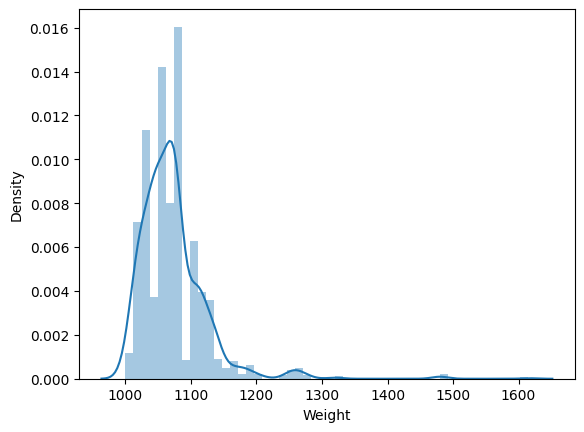

In [586]:
sns.distplot(df['Weight'])

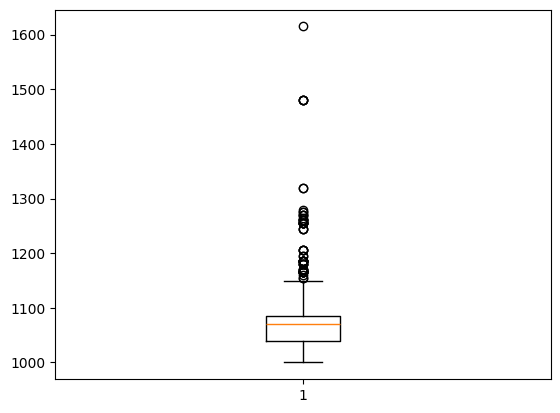

In [587]:
weight_box=plt.boxplot(df['Weight'])

In [588]:
df['Weight'].skew()

np.float64(3.127525028740004)

In [589]:
weight_out=[]
for i in weight_box['fliers']:
    weight_out.append(i.get_ydata())
print(len(weight_out[0]))
weight_out

64


[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1245, 1265, 1260,
        1260, 1260, 1155, 1480, 1480, 1480, 1320, 1270, 1280, 1270, 1255,
        1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205, 1170,
        1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172])]

In [590]:
#Q1=df['Weight'].quantile(0.25)
#Q3=df['Weight'].quantile(0.75)
#IQR=Q3-Q1
#print(Q1,Q3,IQR)

In [591]:
#Q3+1.5*IQR

In [592]:
#x=lambda x:x>Q3+1.5*IQR or x<Q1-1.5*IQR

In [593]:
#outliers = [v for v in df['Weight'] if x(v)]
#print(len(outliers))


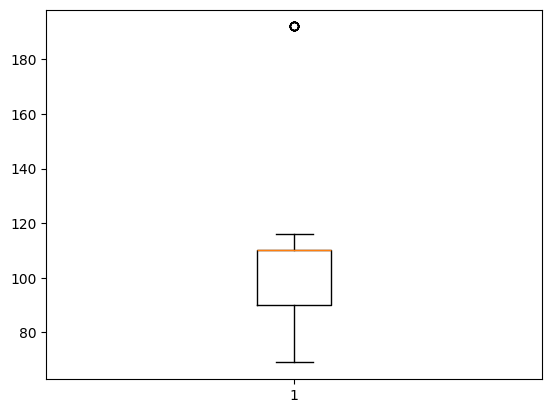

In [594]:
hp_box=plt.boxplot(df['HP'])

In [595]:
hp_out=[]
for i in hp_box['fliers']:
    hp_out.append(i.get_ydata())
print(len(hp_out[0]))
hp_out

11


[array([192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192])]

In [596]:
df['Price'].corr(df['HP']) # It is moderately correlated

np.float64(0.31480372755288044)

<Axes: xlabel='Price', ylabel='HP'>

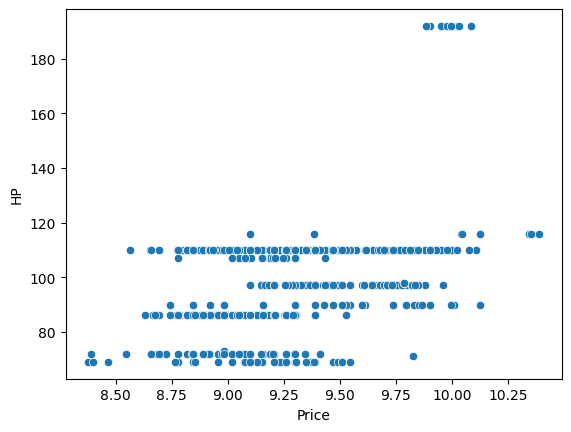

In [597]:
sns.scatterplot(x=df['Price'],y=df['HP'])

In [ ]:
#one-way ANOVA(f_oneway) 
from scipy.stats import f_oneway
petrol = df[df['Fuel_Type'] == "Petrol"]["Price"]
diesel = df[df['Fuel_Type'] == "Diesel"]["Price"]
cng = df[df['Fuel_Type'] == "CNG"]["Price"]
f_stat, p = f_oneway(petrol, diesel, cng)
print("F-statistic:", f_stat)
print("p-value:", p)
#p-value < 0.05) -> reject null -> mean car price differs significantly between at least two fuel types.

F-statistic: 1.3079635531216736
p-value: 0.27069311888779185


In [599]:
df['Gears'].unique()

array([5, 6, 3, 4])

In [600]:
petrol = df[df['Gears'] == 5]["Price"]
diesel = df[df['Gears'] == 6]["Price"]
cng = df[df['Gears'] == 3]["Price"]
sd=df[df['Gears']==4]["Price"]

f_stat, p = f_oneway(petrol, diesel, cng,sd)

print("F-statistic:", f_stat)
print("p-value:", p)

F-statistic: 2.3943128954795085
p-value: 0.06674745655483341


In [601]:
df['Doors'].unique()

array([3, 5, 4, 2])

In [602]:
petrol = df[df['Doors'] == 2]["Price"]
diesel = df[df['Doors'] == 3]["Price"]
cng = df[df['Doors'] == 4]["Price"]
sd=df[df['Doors']==5]["Price"]

f_stat, p = f_oneway(petrol, diesel, cng,sd)

print("F-statistic:", f_stat)
print("p-value:", p)

F-statistic: 21.433673228685574
p-value: 1.3974951800423986e-13


In [603]:
pd.get_dummies(df['Fuel_Type'],dtype=int)

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1429,0,0,1
1430,0,0,1
1431,0,0,1
1432,0,0,1


In [604]:
df = pd.concat([df, pd.get_dummies(df['Fuel_Type'], prefix="Fuel",dtype=int)], axis=1)

In [605]:

df

,level_0,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,0,0,9.510519,23,216.762543,Diesel,90,0,2000,3,5,1165,0,1,0
1,1,1,9.528867,23,270.068510,Diesel,90,0,2000,3,5,1165,0,1,0
2,2,2,9.543306,24,204.232710,Diesel,90,0,2000,3,5,1165,0,1,0
3,3,3,9.612533,26,219.089023,Diesel,90,0,2000,3,5,1165,0,1,0
4,4,4,9.528867,30,196.214169,Diesel,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,1431,8.922792,69,143.331783,Petrol,86,0,1300,3,5,1025,0,0,1
1430,1431,1432,9.291552,72,137.840488,Petrol,86,0,1300,3,5,1015,0,0,1
1431,1432,1433,9.047939,71,130.445391,Petrol,86,0,1300,3,5,1015,0,0,1
1432,1433,1434,8.888895,70,130.061524,Petrol,86,0,1300,3,5,1015,0,0,1


In [606]:
df.drop('Fuel_Type',axis=1,inplace=True)

In [607]:
df.head()

,level_0,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,0,0,9.510519,23,216.762543,90,0,2000,3,5,1165,0,1,0
1,1,1,9.528867,23,270.068510,90,0,2000,3,5,1165,0,1,0
2,2,2,9.543306,24,204.232710,90,0,2000,3,5,1165,0,1,0
3,3,3,9.612533,26,219.089023,90,0,2000,3,5,1165,0,1,0
4,4,4,9.528867,30,196.214169,90,0,2000,3,5,1170,0,1,0


In [608]:
df['Price'].corr(df['Fuel_CNG'])

np.float64(-0.042491182891335404)

In [609]:
df['Price'].corr(df['Fuel_Diesel'])

np.float64(-0.0027648567392747803)

In [610]:
df['Price'].corr(df['Fuel_Petrol'])

np.float64(0.01683227697798018)

In [611]:
# for catagorica vs catagorical Chi square test
# stats.ch2_contigency(df_col1,df_col2)
# for catagorical(0/1) vs continuous is t_test
# for catagorical(more than 2 catogeries) vs continous is ANOVA 

In [612]:
from scipy.stats import ttest_ind

auto = df[df['Automatic'] == 1]['Price']
manual = df[df['Automatic'] == 0]['Price']
t_stat, p = ttest_ind(auto, manual)
print("t-statistic:", t_stat)
print("p-value:", p)

t-statistic: 1.3283676836293545
p-value: 0.18426832744014307


In [613]:
from scipy.stats import ttest_ind

auto = df[df['Fuel_Petrol'] == 1]['Price']
manual = df[df['Fuel_Petrol'] == 0]['Price']

t_stat, p = ttest_ind(auto, manual)

print("t-statistic:", t_stat)
print("p-value:", p)

t-statistic: 0.6370535057211283
p-value: 0.5241918202452369


In [614]:
auto = df[df['Fuel_CNG'] == 1]['Price']
manual = df[df['Fuel_CNG'] == 0]['Price']
t_stat, p = ttest_ind(auto, manual)
print("t-statistic:", t_stat)
print("p-value:", p)

t-statistic: -1.6093953574145328
p-value: 0.1077503291976145


In [615]:
auto = df[df['Fuel_CNG'] == 1]['Price']
manual = df[df['Fuel_CNG'] == 0]['Price']
t_stat, p = ttest_ind(auto, manual)
print("t-statistic:", t_stat)
print("p-value:", p)

t-statistic: -1.6093953574145328
p-value: 0.1077503291976145


In [616]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [617]:
df_1=pd.DataFrame(df,columns=['Price','Age_08_04','KM','HP','Automatic','cc','Doors','Gears','Weight'])

In [618]:
df_1[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Weight']]=sc.fit_transform(df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Weight']])

In [619]:
df_1.shape

(1434, 9)

In [620]:
df

,level_0,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,0,0,9.510519,23,216.762543,90,0,2000,3,5,1165,0,1,0
1,1,1,9.528867,23,270.068510,90,0,2000,3,5,1165,0,1,0
2,2,2,9.543306,24,204.232710,90,0,2000,3,5,1165,0,1,0
3,3,3,9.612533,26,219.089023,90,0,2000,3,5,1165,0,1,0
4,4,4,9.528867,30,196.214169,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,1431,8.922792,69,143.331783,86,0,1300,3,5,1025,0,0,1
1430,1431,1432,9.291552,72,137.840488,86,0,1300,3,5,1015,0,0,1
1431,1432,1433,9.047939,71,130.445391,86,0,1300,3,5,1015,0,0,1
1432,1433,1434,8.888895,70,130.061524,86,0,1300,3,5,1015,0,0,1


In [621]:
df_1=pd.DataFrame(df_1,columns=['Price','Age_08_04','KM','HP','Automatic','cc','Doors','Gears','Weight'])

In [622]:
df_1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,0.941851,-1.779543,-0.470757,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422
1,1.004064,-1.779543,0.253982,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422
2,1.053026,-1.725621,-0.641110,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422
3,1.287760,-1.617777,-0.439126,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422
4,1.004064,-1.402088,-0.750129,-0.766773,0,2.319462,-1.083747,-0.140525,1.874254
...,...,...,...,...,...,...,...,...,...
1429,-1.051006,0.700875,-1.469108,-1.033801,0,-1.425944,-1.083747,-0.140525,-0.904889
1430,0.199380,0.862641,-1.543767,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554
1431,-0.626658,0.808719,-1.644309,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554
1432,-1.165943,0.754797,-1.649528,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554


In [623]:
df_1.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [624]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1434 non-null   float64
 1   Age_08_04  1434 non-null   float64
 2   KM         1434 non-null   float64
 3   HP         1434 non-null   float64
 4   Automatic  1434 non-null   int64  
 5   cc         1434 non-null   float64
 6   Doors      1434 non-null   float64
 7   Gears      1434 non-null   float64
 8   Weight     1434 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 101.0 KB


In [625]:
df_1[['Fuel_CNG','Fuel_Diesel','Fuel_Petrol']]=df[['Fuel_CNG','Fuel_Diesel','Fuel_Petrol']]

In [626]:
df_1.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
count,1.434000e+03,1.434000e+03,1.434000e+03,1.434000e+03,1434.000000,1.434000e+03,1.434000e+03,1.434000e+03,1.434000e+03,1434.000000,1434.000000,1434.000000
mean,4.201815e-15,-1.585590e-16,-4.558573e-16,-1.585590e-16,0.055091,-1.387392e-16,-2.477485e-16,-3.840102e-17,-1.228833e-15,0.011855,0.107392,0.880753
std,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,0.228237,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,0.108271,0.309719,0.324192
min,-2.897731e+00,-2.965830e+00,-3.404226e+00,-2.168669e+00,0.000000,-1.425944e+00,-2.133810e+00,-1.074647e+01,-1.384052e+00,0.000000,0.000000,0.000000
25%,-6.466603e-01,-6.471783e-01,-5.985319e-01,-7.667735e-01,0.000000,-8.908865e-01,-1.083747e+00,-1.405250e-01,-6.173914e-01,0.000000,0.000000,1.000000
50%,-1.097262e-01,2.694978e-01,7.003513e-03,5.683648e-01,0.000000,1.792295e-01,-3.368403e-02,-1.405250e-01,-4.239620e-02,0.000000,0.000000,1.000000
75%,5.283489e-01,7.547970e-01,5.938042e-01,5.683648e-01,0.000000,1.792295e-01,1.016379e+00,-1.405250e-01,2.451014e-01,0.000000,0.000000,1.000000
max,3.920680e+00,1.294018e+00,3.284243e+00,6.042432e+00,1.000000,2.319462e+00,1.016379e+00,5.162445e+00,1.040335e+01,1.000000,1.000000,1.000000


In [627]:
df_1.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
Price,1.000000,-0.875844,-0.651963,0.314804,0.035082,0.126107,0.187810,0.068047,0.501856,-0.042491,-0.002765,0.016832
Age_08_04,-0.875844,1.000000,0.581165,-0.154800,0.036396,-0.129482,-0.145941,-0.005799,-0.465226,0.002072,-0.093557,0.088688
KM,-0.651963,0.581165,1.000000,-0.297131,-0.071871,0.248017,-0.053167,0.020989,-0.102272,0.126917,0.332787,-0.360317
HP,0.314804,-0.154800,-0.297131,1.000000,0.011753,0.049366,0.091444,0.209722,0.086464,0.062254,-0.537062,0.492295
Automatic,0.035082,0.036396,-0.071871,0.011753,1.000000,-0.069990,-0.030600,-0.098764,0.052972,0.001792,-0.083753,0.079415
cc,0.126107,-0.129482,0.248017,0.049366,-0.069990,1.000000,0.125329,0.041015,0.650814,0.019562,0.760724,-0.733296
Doors,0.187810,-0.145941,-0.053167,0.091444,-0.030600,0.125329,1.000000,-0.160060,0.300827,0.009842,0.023793,-0.026018
Gears,0.068047,-0.005799,0.020989,0.209722,-0.098764,0.041015,-0.160060,1.000000,0.021472,-0.049559,-0.048743,0.063118
Weight,0.501856,-0.465226,-0.102272,0.086464,0.052972,0.650814,0.300827,0.021472,1.000000,0.053767,0.566011,-0.558700
Fuel_CNG,-0.042491,0.002072,0.126917,0.062254,0.001792,0.019562,0.009842,-0.049559,0.053767,1.000000,-0.037992,-0.297676


<Axes: >

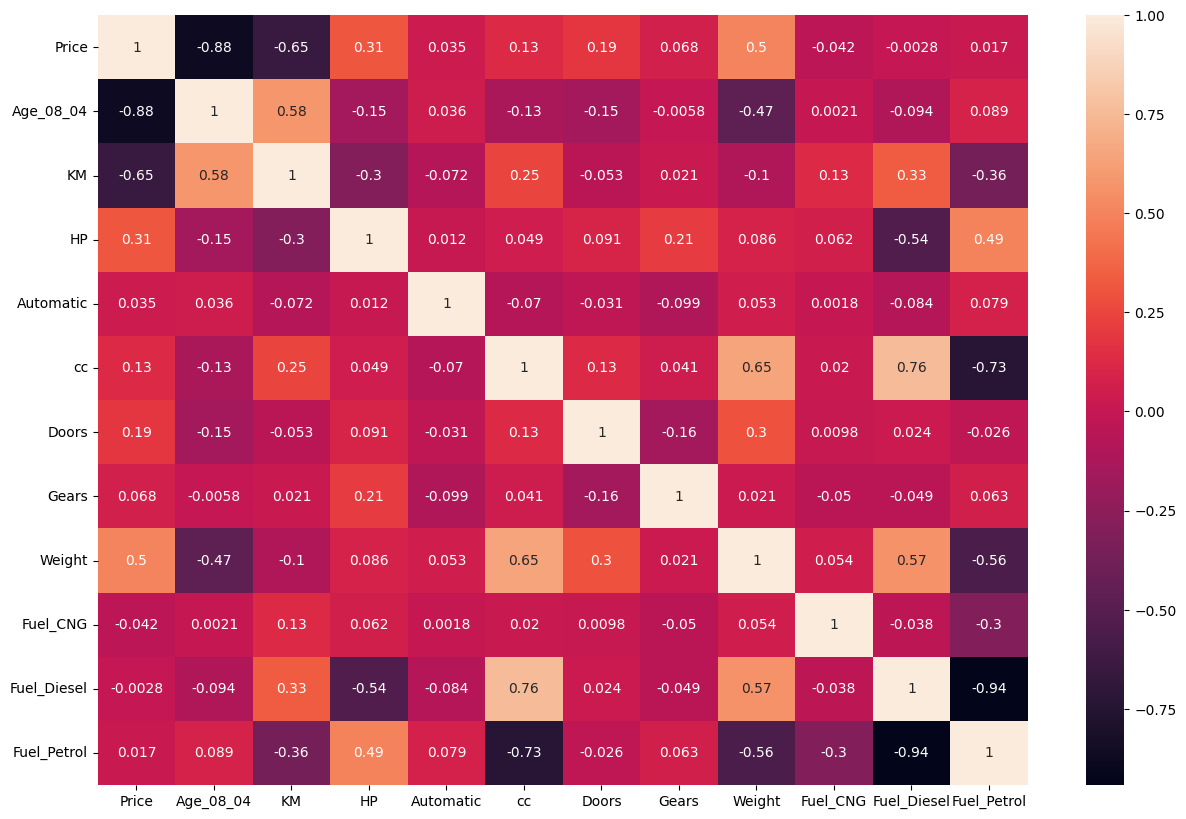

In [628]:
fig=plt.figure(figsize=[15,10])
sns.heatmap(df_1.corr(),annot=True)

In [629]:
df_1.isnull().sum()

Price          0
Age_08_04      0
KM             0
HP             0
Automatic      0
cc             0
Doors          0
Gears          0
Weight         0
Fuel_CNG       0
Fuel_Diesel    0
Fuel_Petrol    0
dtype: int64

In [630]:
df_2=df_1.drop('Fuel_Petrol',axis=1)
df_2

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG,Fuel_Diesel
0,0.941851,-1.779543,-0.470757,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0,1
1,1.004064,-1.779543,0.253982,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0,1
2,1.053026,-1.725621,-0.641110,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0,1
3,1.287760,-1.617777,-0.439126,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0,1
4,1.004064,-1.402088,-0.750129,-0.766773,0,2.319462,-1.083747,-0.140525,1.874254,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1429,-1.051006,0.700875,-1.469108,-1.033801,0,-1.425944,-1.083747,-0.140525,-0.904889,0,0
1430,0.199380,0.862641,-1.543767,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554,0,0
1431,-0.626658,0.808719,-1.644309,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554,0,0
1432,-1.165943,0.754797,-1.649528,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554,0,0


In [631]:
df_2.isnull().sum()

Price          0
Age_08_04      0
KM             0
HP             0
Automatic      0
cc             0
Doors          0
Gears          0
Weight         0
Fuel_CNG       0
Fuel_Diesel    0
dtype: int64

In [632]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [633]:
df_2.drop('Fuel_Diesel',axis=1,inplace=True)

In [634]:
df_2

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG
0,0.941851,-1.779543,-0.470757,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0
1,1.004064,-1.779543,0.253982,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0
2,1.053026,-1.725621,-0.641110,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0
3,1.287760,-1.617777,-0.439126,-0.766773,0,2.319462,-1.083747,-0.140525,1.778422,0
4,1.004064,-1.402088,-0.750129,-0.766773,0,2.319462,-1.083747,-0.140525,1.874254,0
...,...,...,...,...,...,...,...,...,...,...
1429,-1.051006,0.700875,-1.469108,-1.033801,0,-1.425944,-1.083747,-0.140525,-0.904889,0
1430,0.199380,0.862641,-1.543767,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554,0
1431,-0.626658,0.808719,-1.644309,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554,0
1432,-1.165943,0.754797,-1.649528,-1.033801,0,-1.425944,-1.083747,-0.140525,-1.096554,0


In [635]:
X=df_2.drop('Price',axis=1)
Y=df_2['Price']

In [636]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]
print("VIF values:\n", vif_data)

VIF values:
      feature       VIF
0      const  1.074704
1  Age_08_04  2.076154
2         KM  2.087815
3         HP  1.224794
4  Automatic  1.060409
5         cc  2.220476
6      Doors  1.171802
7      Gears  1.119560
8     Weight  2.625659
9   Fuel_CNG  1.055799


### Linear Regression model 

In [637]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [638]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [639]:
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

In [640]:
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_model():
    print(f"Linear Regression:")
    print("  R2 Score :", r2_score(Y_test, y_pred))
    print("  RMSE     :", np.sqrt(mean_squared_error(Y_test, y_pred)))
    print("-"*40)

In [641]:
evaluate_model()

Linear Regression:
  R2 Score : 0.8299791928777461
  RMSE     : 0.3870266227872749
----------------------------------------


In [642]:
import statsmodels.api as smf

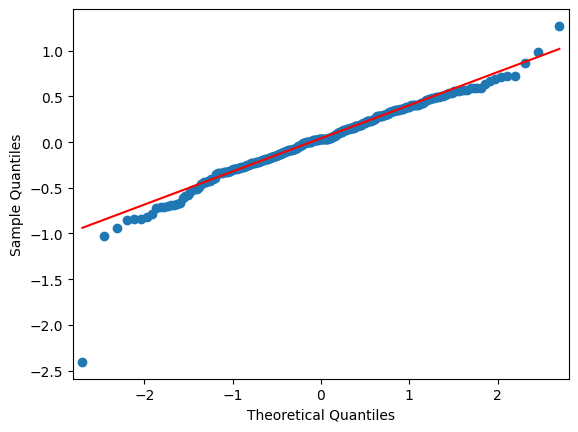

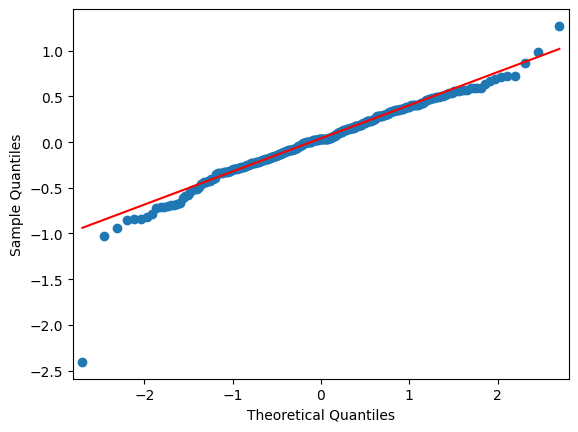

In [643]:
residuals = Y_test - y_pred
smf.qqplot(residuals,line='q')

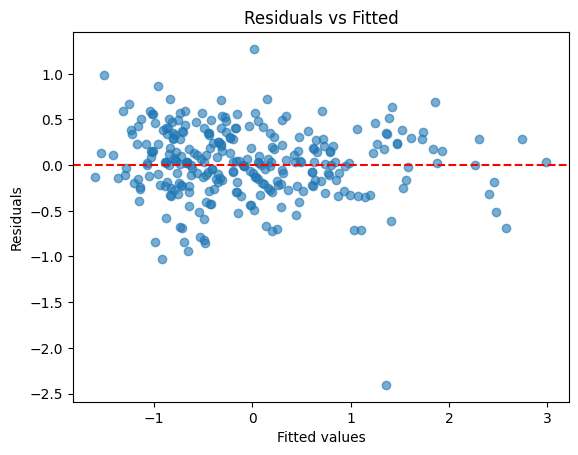

In [644]:
# residual plot for the outliers 
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

In [645]:
y_train_pred = lin_reg.predict(X_train)

In [646]:
# Manual R²
r2_train = r2_score(Y_train, y_train_pred)
r2_test  = r2_score(Y_test, y_pred)

print("Train R²:", r2_train)
print("Test R² :", r2_test)

Train R²: 0.8448061106408119
Test R² : 0.8299791928777461


In [647]:
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE :", test_rmse)

Train RMSE: 0.3997410369651043
Test RMSE : 0.3870266227872749


### Stats OLS model

In [648]:
X_train_sm = smf.add_constant(X_train)

# Fit OLS model
ols_model = smf.OLS(Y_train, X_train).fit()

# Influence measures
influence = ols_model.get_influence()

cooks, pvals = influence.cooks_distance
print(cooks)

[1.65530089e-04 6.95385000e-05 2.30368153e-05 ... 4.65601657e-06
 1.22949993e-05 4.20819034e-05]


In [649]:
y_pred_ols=ols_model.predict(X_test) # predicting using ols model

In [650]:
r2_test  = r2_score(Y_test, y_pred_ols)
r2_test # ols model prediction score

0.8302826778127261

In [651]:
y_pred_ols_train=ols_model.predict(X_train)
r2_train  = r2_score(Y_train, y_pred_ols_train)
r2_train

0.844719262404118

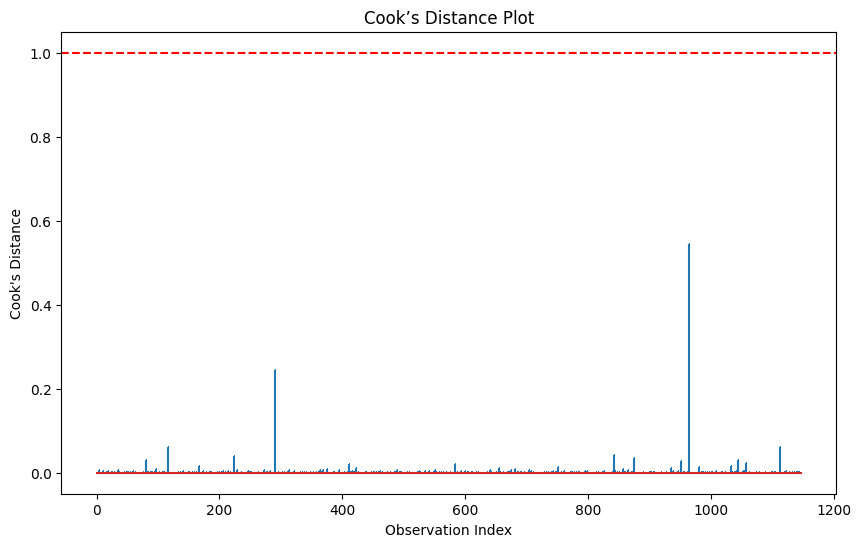

In [652]:
# Plot Cook’s Distance /Stem plot where the values greater than 1 are considered as outliers
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.axhline(1, color="red", linestyle="--")  # threshold
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook’s Distance Plot")
plt.show()


In [653]:
# Rule of thumb threshold
n = X_train.shape[0]   # number of observations
threshold = 4 / n
print("Cook's Distance Threshold:", threshold )# we use this threshold for the large data sets
      

Cook's Distance Threshold: 0.0034873583260680036


In [654]:
threshold=1 # for general rule of thumb we use 1
# Find influential points
influential_points = np.where(cooks > 1)[0]
influential_points

array([], dtype=int64)

In [655]:
df_2.iloc[influential_points]# there are no values so there are no outliers

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_CNG


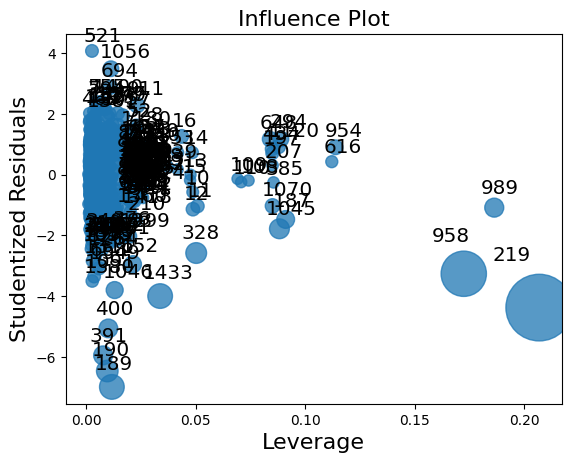

In [656]:

# Influence plot
sm.graphics.influence_plot(model, criterion="cooks")
plt.show()

In [657]:
# Get coefficients
print("Intercept (w0):", lin_reg.intercept_)
print("Coefficients (w1, w2, ...):", lin_reg.coef_) # if coefficent is +ve then increase in value target increases ,if -ve the value increase target decrease

Intercept (w0): -0.009782291880483254
Coefficients (w1, w2, ...): [-0.65390591 -0.21401466  0.13264988  0.18342931 -0.01819121  0.03005085
  0.04618465  0.16879511 -0.39748193]


In [658]:
import pandas as pd

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
})

print(coeff_df)

     Feature  Coefficient
0  Age_08_04    -0.653906
1         KM    -0.214015
2         HP     0.132650
3  Automatic     0.183429
4         cc    -0.018191
5      Doors     0.030051
6      Gears     0.046185
7     Weight     0.168795
8   Fuel_CNG    -0.397482


In [659]:
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_model():
    print(f"Linear Regression:")
    print("  R2 Score :", r2_score(y_test, y_pred_1))
    print("  RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_1)))
    print("-"*40)

In [660]:
evaluate_model()

Linear Regression:
  R2 Score : 0.8299791928777461
  RMSE     : 0.3870266227872749
----------------------------------------


### DecisionTreeRegressor Model

In [661]:
from sklearn.tree import DecisionTreeRegressor

In [662]:
tree_model=DecisionTreeRegressor(criterion='squared_error',max_depth=4)

In [663]:
tree_model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [664]:
y_pred=tree_model.predict(x_test)

In [665]:
r2_score(y_test,y_pred) # test accuracy

0.8233506319450004

In [666]:
tree_model.score(x_test,y_test)

0.8233506319450004

In [667]:
train_pred=tree_model.predict(x_train)
r2_score(y_train,train_pred) # train accuracy

0.8467707481749185

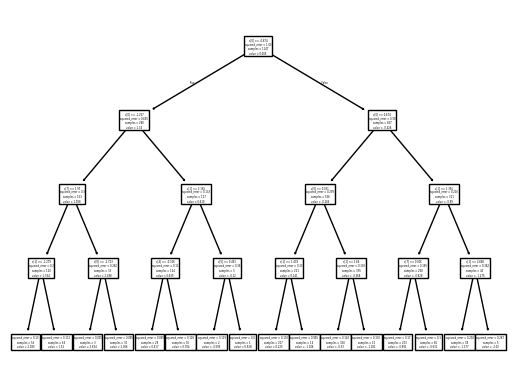

In [668]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

#### Interpretation
**From all the above models the ols model performs better performance than the other two models (LinearRegression and decisiontreeregression) as with 83.02826778127261%** 


### RIDGE(L2 Regularization) and LASSO (L1 Regularization) regressions

In [669]:
def evaluate_model(y_true, y_pred, name="Model"):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name}")
    print(f" R²: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}\n")

In [670]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
y_pred_ridge_train=ridge.predict(x_train)
evaluate_model(y_train, y_pred_ridge_train, "Ridge Regression")
print("Ridge Coefficients:", ridge.coef_)


Ridge Regression
 R²: 0.8304
MSE: 0.1494
RMSE: 0.3865
MAE: 0.2898

Ridge Regression
 R²: 0.8448
MSE: 0.1598
RMSE: 0.3998
MAE: 0.2960

Ridge Coefficients: [-0.65262662 -0.21534454  0.1320917   0.17983141 -0.01774945  0.03007743
  0.04639199  0.16874208 -0.36479718]


In [671]:
from sklearn.linear_model import Lasso #Least Absolute Shrinkage & Selection Operator

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(x_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression Test")

y_pred_lasso_train = lasso.predict(x_train)
evaluate_model(y_train, y_pred_lasso_train, "Lasso Regression")

print("Lasso Coefficients:", lasso.coef_)


Lasso Regression Test
 R²: 0.8236
MSE: 0.1554
RMSE: 0.3942
MAE: 0.3026

Lasso Regression
 R²: 0.8176
MSE: 0.1878
RMSE: 0.4333
MAE: 0.3225

Lasso Coefficients: [-0.62962404 -0.1649141   0.06949785  0.          0.          0.
  0.          0.09604853 -0.        ]


**Interpretation**

Ridge:Reduces overfitting by shrinking the values(all small or closes to zero)

Lasso:performs variable selection by forcing some coefficents to 0

From the above the Ridge Regression performs better so there are many correlated predictors/features

If Lasso performs better: dataset has many irrelevant predictors.

## Conclusion

From all the above Models the Ridge Regression giving more accurcy of 83.04%